In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.linear_model import SGDClassifier

In [8]:
df = pd.read_csv("dataset_train.csv")
# print(df.describe()['mean'])
# print(df.dtypes)
# Which Hogwarts class has an homogenous grade repartition between the four houses?
df.describe()

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [9]:


mean_values = df.select_dtypes(include='number').mean().values
std_values = df.select_dtypes(include='number').std()
std_name = df.select_dtypes(include='number').std()
std_df = std_df = pd.DataFrame(std_values).reset_index()
std_df.columns = ['coures', 'std']
std_df['mean'] = (mean_values)
std_df['totale_casi'] = (std_df['std'] - std_df['std'].min()) / (std_df['std'].max() - std_df['std'].min())
sns.set(style='ticks', palette='Set2')
std_df.head()
# my_plot = sns.barplot(x="coures", y="totale_casi", data=std_df)
# my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


,coures,std,mean,totale_casi
0,Index,462.024530,799.500000,0.027643
1,Arithmancy,16679.806036,49634.570243,1.000000
2,Astronomy,520.298268,39.797131,0.031137
3,Herbology,5.219682,1.141020,0.000255
4,Defense Against the Dark Arts,5.212794,-0.387863,0.000254


Hogwarts House,index,Gryffindor,Hufflepuff,Ravenclaw,Slytherin
0,Index,0.000000,0.251414,1.000000,0.691421
1,Arithmancy,0.000000,1.000000,0.287787,0.224313
2,Astronomy,0.995602,1.000000,0.016388,0.000000
3,Herbology,0.000000,0.989552,1.000000,0.000845
4,Defense Against the Dark Arts,0.003385,0.000000,0.985327,1.000000
5,Divination,0.987768,1.000000,0.996567,0.000000
6,Muggle Studies,0.000000,0.003162,1.000000,0.022967
7,Ancient Runes,0.995873,0.000000,1.000000,0.008433
8,History of Magic,0.000000,1.000000,0.990399,0.995663
9,Transfiguration,0.000000,0.976812,0.984474,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_936\128134620.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)


<Figure size 800x400 with 0 Axes>

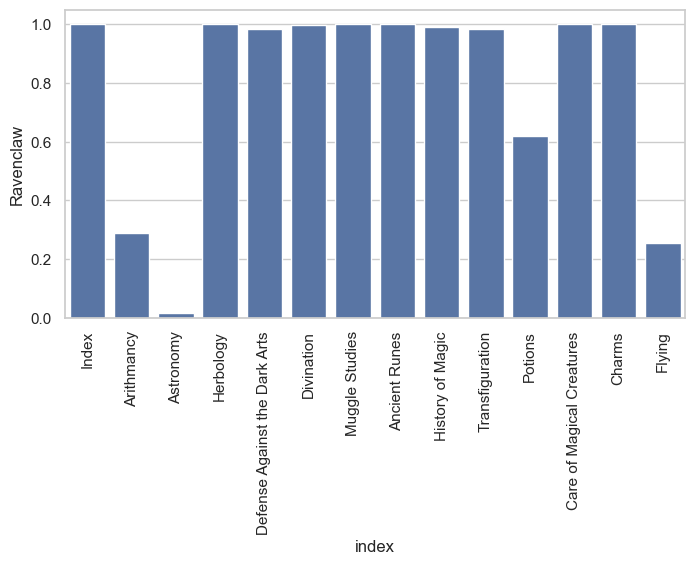

In [10]:

grouped_means = pd.DataFrame(df.select_dtypes(include='number'))

# grouped_means.head()
grouped_means['Hogwarts House'] = df['Hogwarts House']
df_new = grouped_means.groupby('Hogwarts House').mean()
df_new = (df_new - df_new.min()) / (df_new.max() - df_new.min())

df_transposed = df_new.T.reset_index()

# df_transposed.dtypes
# df_transposed['Gryffindor'] = (df_transposed['Gryffindor'] - df_transposed['Gryffindor'].min()) / (df_transposed['Gryffindor'].max() - df_transposed['Gryffindor'].min())
# df_transposed['Hufflepuff'] = (df_transposed['Hufflepuff'] - df_transposed['Hufflepuff'].min()) / (df_transposed['Hufflepuff'].max() - df_transposed['Hufflepuff'].min())
display(df_transposed.head(10))
# print(df_new['Hogwarts House'])
# Print the first column by position
# print(df_new.groups.keys())
# print(df_new['Hogwarts House'])
# df_new.head(3)
# plt.style.use('bmh')
plt.figure(figsize=(8, 4))

# sns.barplot(x="index", y="Hufflepuff",data=df_transposed, color='blue', label="Hug", alpha = 0.8)
# sns.barplot(x="index", y="Gryffindor",data=df_transposed,color='red', alpha = 0.3)
# sns.barplot(x="index", y="Slytherin",data=df_transposed,color='green')
# my_plote = sns.barplot(x="index", y="Ravenclaw",data=df_transposed, palette='vlag')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='index', y='Ravenclaw', data=df_transposed)
# plt.legend(title="Category")
# plt.title("Comparison of Houses")
# plt.ylabel("Values")
# plt.xlabel("cours")

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
plt.show()
# sns.histplot(penguins, x="flipper_length_mm", hue="species", element="poly")



In [ ]:
houses = {"Gryffindor": 1, "Hufflepuff": 2, "Ravenclaw": 3, "Slytherin": 4}
def get_key(val, my_dict):
    for key, value in my_dict.items():
        if val == value:
            return key



0.9714569677256252 Care of Magical Creatures
[-0.0140404172390529, -0.2640700765443832, 0.1530218296077356, 1.1470315267700957, -1.135957011752296, 0.1736145483146391, 0.1625012864221627, 1.5627795342839057, -1.5510451995400842, 0.3585953072795056, 0.4720483839118659, -1.416966998705505, -2.0024508868722384, -0.6921841218019021, 0.4131136082059517, 0.602047949653184, 1.1736933909229337, 1.245107500969116, -1.4746064699518395, nan, -0.9146227391949916, -0.496053015772492, 0.8078199234012003, -0.5508715518068543, -0.8137008722795482, 0.2411916856305921, -0.4197077744965173, 0.5535948439413207, 0.4173716471038083, 1.5883960374994828, 0.4112315305903757, -1.791074054701447, 1.0580512403618028, -1.1287205243874516, 0.6104043636926044, -1.0281133022192503, 0.4511973960368234, -0.9599175291104838, -0.661986196739527, 1.0142778768826, -0.4725118722427806, -1.1448344648640176, -0.259603417947153, 0.4407498928480383, -0.3451598788503426, -0.5824170704458294, -1.4676454957639429, -1.3744511098742

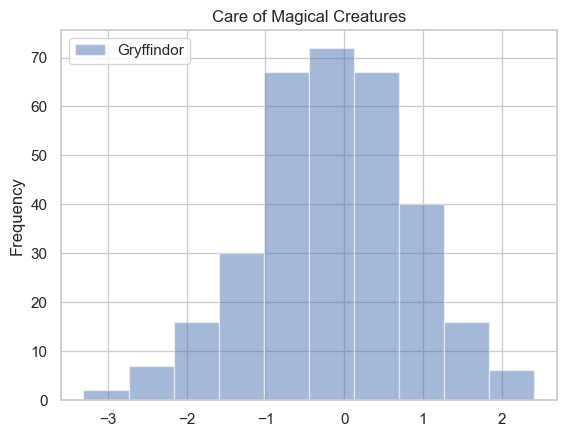

In [28]:

def histogram(dataset):
    dataset["Hogwarts House"].replace(houses, inplace=True)
    data = dataset.select_dtypes("number")
    min_std = 9999999
    best = ""
    for col in data.columns:
        # print(col)
        if col != "Hogwarts House" and col != "Index":
            if min_std > data[col].std():
                min_std = data[col].std()
                best = col
    print(min_std, best)
    plt.figure()
    col = best
    plt.title(best)
    for i in range(1, 5):
        current = []
        for index, elem in enumerate(data[col]):
            if data["Hogwarts House"][index] == i:
                current.append(elem)
        house = get_key(i, houses)
        print(current)
        plt.hist(current, alpha=0.5, label=house)
        plt.ylabel("Frequency")
        plt.legend(loc="upper left")
        break
    plt.show()
histogram(df)
